# Chapter 9 - Up and Running with TensorFlow

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os, itertools

In [3]:
from sklearn import datasets

**TensorFlow** is a powerful open source software library for numerical computation, particularly well suited and fine-tuned for large-scale Machine Learning. 

Its basic principle: 

You first define in Python a **graph of computations** to perform (for example, the one in Figure 9-1), and then TensorFlow takes that graph and runs it efficiently using optimized C++ code.

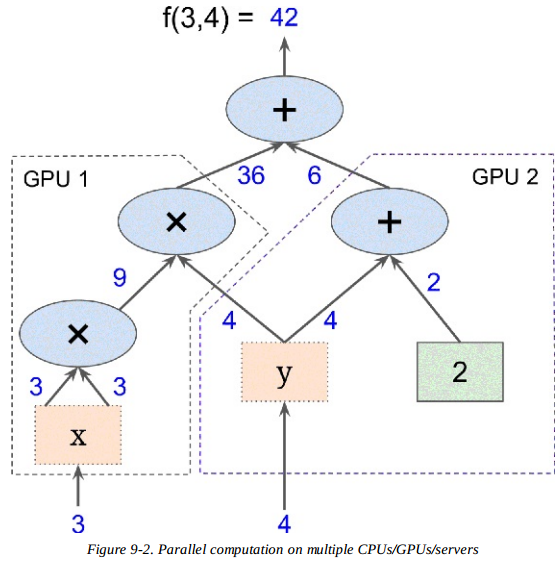

It is possible to break up the graph into **several chunks** and run them in **parallel** across multiple CPUs or GPUs (as shown in Figure 9-2). 

TensorFlow also supports **distributed computing**, so you can train colossal neural networks on humongous training sets in a reasonable amount of time by splitting the computations across hundreds of servers. 

TensorFlow can train a network with millions of parameters on a training set composed of billions of instances with millions of features each. This should come as no surprise, since TensorFlow was developed by the *Google Brain* team and it powers many of Google’s large-scale services, such as Google Cloud Speech, Google Photos, and Google Search.

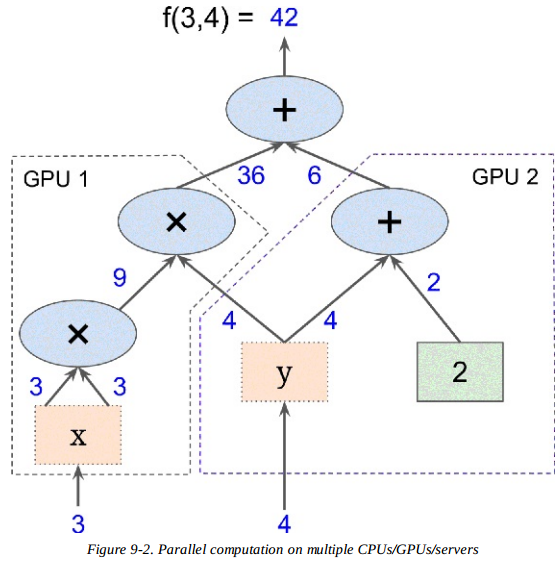

When TensorFlow was open-sourced in November 2015, there were already many popular open source
libraries for Deep Learning (Table 9-1 lists a few), and to be fair most of TensorFlow’s features already existed in one library or another. 

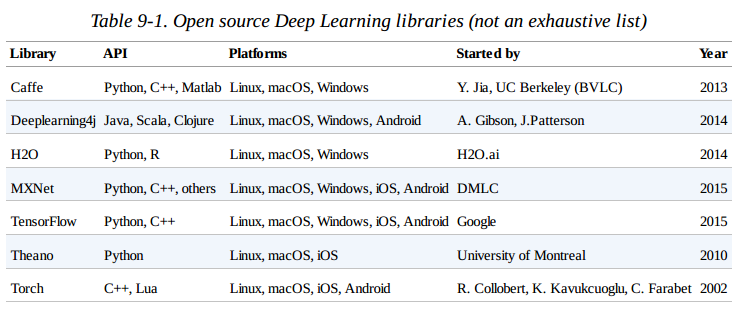

TensorFlow’s clean design, scalability, flexibility, and great documentation (not to mention Google’s name) quickly boosted it to the top of the list. In short, TensorFlow was designed to be flexible, scalable, and production-ready, and existing frameworks arguably hit only two out of the three of these. 

Here are some of TensorFlow’s highlights:

* It runs not only on Windows, Linux, and macOS, but also on mobile devices, including both iOS and Android.

* It provides a very simple Python API called **TF.Learn** (`tensorflow.contrib.learn`), compatible with Scikit-Learn. As you will see, you can use it to train various types of neural networks in just a few lines of code. It was previously an independent project called **Scikit Flow** (or *skflow*).


* It also provides another simple API called **TF-slim** (`tensorflow.contrib.slim`) to simplify building, training, and evaluating neural networks.

* Several other high-level APIs have been built independently on top of TensorFlow, such as **Keras** (now available in `tensorflow.contrib.keras`) or **Pretty Tensor**.

* Its main Python API offers much more flexibility (at the cost of higher complexity) to create all sorts of computations, including any neural network architecture you can think of.

* It includes highly efficient C++ implementations of many ML operations, particularly those needed to build neural networks. There is also a C++ API to define your own high-performance operations.

* It provides several advanced optimization nodes to search for the parameters that minimize a cost function. These are very easy to use since TensorFlow automatically takes care of computing the gradients of the functions you define. This is called **automatic differentiating* (or autodiff).

* It also comes with a great visualization tool called **TensorBoard** that allows you to browse throughn the computation graph, view learning curves, and more.

* Google also launched a cloud service to run TensorFlow graphs. (https://cloud.google.com/ml)

* Last but not least, it has a dedicated team of passionate and helpful developers, and a growing community contributing to improving it. It is one of the most popular open source projects on GitHub, and more and more great projects are being built on top of it (for examples, check out the resources page on https://www.tensorflow.org/, or https://github.com/jtoy/awesome-tensorflow).

## Installation

You can simply use **pip** to install TensorFlow. 
If you created an isolated environment using virtualenv, you first need to activate it:

`$ cd $ML_PATH # Your ML working directory (e.g., $HOME/ml)`

`$ source env/bin/activate`

Next, install TensorFlow:

`$ pip3 install --upgrade tensorflow`

For GPU support, you need to install `tensorflow-gpu` instead of tensorflow. 

To test your installation, type the following command. It should output the version of TensorFlow you installed.

`$ python3 -c 'import tensorflow; print(tensorflow.__version__)'`

### Creating Your First Graph and Running It in a Session

The following code creates the graph represented in Figure 9-1:

In [4]:
import tensorflow as tf
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

**This code does not actually perform any computation**, even though it looks like it does (especially the last line). 

It just **creates a computation graph**. 

In fact, even **the variables are not initialized yet**. 

To evaluate this graph, you need to **open a TensorFlow session** and use it to **initialize the variables and evaluate `f`**. 

A TensorFlow **session** takes care of *placing the operations onto devices such as CPUs and GPUs and running them*, and it *holds all the variable values* (In distributed TensorFlow, variable values are stored on the servers instead of the session). 

The following code **creates a session, initializes the variables, and evaluates, and `f` then
closes the session (which frees up resources)**:

In [5]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

AttributeError: module 'tensorflow' has no attribute 'Session'

Having to repeat `sess.run()` all the time is a bit cumbersome, but fortunately there is a better way:

In [ ]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

Inside the `with` block, the session is set as the default session.

Calling `x.initializer.run()` is equivalent to calling `tf.get_default_session().run(x.initializer)`, and similarly `f.eval()` is equivalent to calling `tf.get_default_session().run(f)`. 

Moreover, the session is automatically closed at the end of the block.

Instead of manually running the initializer for every single variable, you can use the
`global_variables_initializer()` function. Note that it **does not actually perform the initialization immediately**, but rather **creates *a* node** in the graph that will **initialize all variables when it is run**:

In [ ]:
init = tf.global_variables_initializer() # prepare an init node
with tf.Session() as sess:
    init.run() # actually initialize all the variables
    result = f.eval()

Inside Jupyter or within a Python shell you may prefer to create an `InteractiveSession`. The only difference from a regular `Session` is that when an `InteractiveSession` is created it **automatically sets itself as the default session**, so you don’t need a `with` block (but you do need to **close** the session **manually** when you are done with it):

In [ ]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

sess.close()

A TensorFlow program is typically split into *two* parts: 

1. The first part builds a computation graph (this is called the **construction phase**). The construction phase typically builds a computation graph representing the ML model and the computations required to train it.
2. The second part runs it (this is the **execution phase**). The execution phase generally runs a loop that evaluates a training step repeatedly (for example, one step per mini-batch), gradually improving the model parameters.




### Managing Graphs

Any node you create is automatically added to the *default graph*:

In [ ]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

In most cases this is fine, but sometimes you may want to *manage multiple independent graphs*. You can do this by **creating a new** `Graph` and **temporarily** *making it the default graph* inside a `with` block, like so:

In [ ]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

In [ ]:
x2.graph is graph

In [ ]:
x2.graph is tf.get_default_graph()

In Jupyter (or in a Python shell), it is common to *run the same commands more than once* while you are experimenting. 

As a result, you may end up with a default graph containing many *duplicate nodes*. One solution is to *restart the Jupyter kernel* (or the Python shell), but a more convenient solution is to just **reset the default graph** by running `tf.reset_default_graph()`.

### Lifecycle of a Node Value

When you evaluate a node, TensorFlow automatically determines the set of nodes that it depends on and it evaluates these nodes first. For example, consider the following code:

In [ ]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

In [ ]:
with tf.Session() as sess:
    print(y.eval()) # 10
    print(z.eval()) # 15

First, this code defines a very simple graph. Then it starts a session and runs the graph to evaluate `y`: 

TensorFlow automatically detects that `y` depends on `x`, which depends on `w`, so it first evaluates `w`, then `x`, then `y`, and returns the value of `y`. Finally, the code runs the graph to evaluate `z`. Once again, TensorFlow detects that it must first evaluate `w` and `x`. 

It is important to note that **it will not reuse the result of the previous evaluation** of `w` and `x`. In short, the preceding code evaluates `w` and `x` **twice**.

**All node values** are dropped between graph runs, except **variable values**, which are maintained by the session across graph runs (queues and readers also maintain some state, as we will see in Chapter 12). 

A variable **starts** its life when its **initializer** is run, and it **ends** when the **session is closed**.

If you want to evaluate `y` and `z` efficiently, without evaluating `w` and `x` twice as in the previous code, you must ask TensorFlow to evaluate both `y` and `z` in **just one graph run**, as shown in the following code:

In [ ]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val) # 10
    print(z_val) # 15

**WARNING**

In single-process TensorFlow, multiple sessions **do not share any state**, **even if they reuse the same graph** (each session would have its own copy of every variable). 

In distributed TensorFlow (see Chapter 12), variable state is stored on the *servers*, not in
the *sessions*, so **multiple sessions can share the same variables**.

### Linear Regression with TensorFlow

TensorFlow operations (also called **ops** for short) can take **any number of inputs** and produce **any number of outputs**. 

For example, the addition and multiplication ops each take two inputs and produce one output.

Constants and variables take **no input** (they are called *source ops*). 

The inputs and outputs are multidimensional arrays, called **tensors** (hence the name “tensor flow”). 

Just like NumPy arrays, tensors have a *type* and a *shape*. 

In fact, in the Python API tensors are simply represented by NumPy ndarrays.

They typically contain *floats*, but you can also use them to carry strings (arbitrary byte arrays).

In the examples so far, the tensors just contained a single scalar value, but you can of course perform computations on arrays of any shape. 

For example, the following code manipulates 2D arrays to perform Linear Regression on the California housing dataset. 


In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

m, n = housing.data.shape

housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

It starts by fetching the dataset;

It adds an extra bias input feature ($x_0 = 1$) to all training instances (it does so using NumPy so it runs immediately)

It creates two TensorFlow constant nodes, `X` and `y`, to hold this data and the targets, and it uses some of the matrix operations provided by TensorFlow to define theta. 
These matrix functions — `transpose()`, `matmul()`, and `matrix_inverse()` — are self-explanatory, but as usual they do not perform any computations immediately; instead, they create nodes in the graph that will perform them when the graph is run. 

The definition of theta corresponds to the Normal Equation. 

Finally, the code creates a session and uses it to evaluate theta.

The main benefit of this code versus computing the Normal Equation directly using NumPy is that
TensorFlow will automatically run this on your GPU card if you have one (provided you installed
TensorFlow with GPU support)

### Implementing Gradient Descent

Let’s try using Batch Gradient Descent instead of the Normal Equation. First we
will do this by manually computing the gradients, then we will use TensorFlow’s **autodiff** feature to let TensorFlow compute the gradients automatically, and finally we will use a couple of TensorFlow’s outof-the-box optimizers.

**WARNING**

When using Gradient Descent, remember that it is important to first **normalize the input feature vectors**, or else training may be much slower. 

You can do this using TensorFlow, NumPy, Scikit-Learn’s StandardScaler, or any other solution you prefer. The following code assumes that this normalization has already been done.

### Manually Computing the Gradients

In [ ]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = 2/m * tf.matmul(tf.transpose(X), error)

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
        print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()


The `random_uniform()` function creates a node in the graph that will generate a tensor containing random values, given its shape and value range, much like NumPy’s `rand()` function.

The `assign()` function creates a node that will assign a new value to a variable. 

In this case, it implements the Batch Gradient Descent step 

$θ^{(next step)} = θ – η \Delta_θ MSE(θ)$.

The main loop executes the training step over and over again (`n_epochs` times), and every 100
iterations it prints out the current Mean Squared Error (mse). 


### Using autodiff

The preceding code works fine, but it requires **mathematically deriving** the gradients from the cost function (MSE). 

If you had to do this with deep neural networks you would get quite a headache: 
it would be tedious and error-prone. 

You could use ***symbolic differentiation*** to automatically find the equations for the partial derivatives for you, but the resulting code **would not necessarily be very efficient**.


To understand why, consider the function $f(x)= exp(exp(exp(x)))$. 

If you know calculus, you can figure out its derivative $f′(x) = exp(x) × exp(exp(x)) × exp(exp(exp(x)))$. 

If you code $f(x)$ and $f′(x)$ separately and exactly as they appear, your code will not be as efficient as it could be. 

A more efficient solution would be to write a function that first computes exp(x), then exp(exp(x)), then exp(exp(exp(x))), and returns all three. This gives you $f(x)$ directly (the third term), and if you need the derivative you can just multiply all three terms and you are done.

With the naïve approach you would have had to call the exp function **nine times** to compute both $f(x)$ and $f′(x)$. With this approach you just need to call it **three times**.


It gets worse when your function is defined by some arbitrary code. Can you find the equation (or the code) to compute the partial derivatives of the following function? Hint: don’t even try.

In [ ]:
def my_func(a, b):
    z = 0
    for i in range(100):
            z = a * np.cos(z + i) + z * np.sin(b - i)
        return z

Fortunately, TensorFlow’s autodiff feature comes to the rescue: 

It can automatically and efficiently compute the gradients for you: 

Simply replace the `gradients = ...` line in the Gradient Descent code in the previous section with the following line, and the code will continue to work just fine:

In [ ]:
gradients = tf.gradients(mse, [theta])[0]

The `gradients()` function takes an **op** (in this case `mse`) and a **list of variables** (in this case just `theta`), and it creates a **list of ops (one per variable) to compute the gradients of the op with regards to each variable**. 

So the gradients node will compute the gradient vector of the MSE with regards to theta.

There are four main approaches to computing gradients automatically. They are summarized in Table 9-2.

TensorFlow uses **reverse-mode autodiff**, which is perfect (efficient and accurate) when **there are many inputs and few outputs**, as is often the case in neural networks. It computes all the partial derivatives of the outputs with regards to **all the inputs** in just $n_{outputs} + 1$ graph traversals.

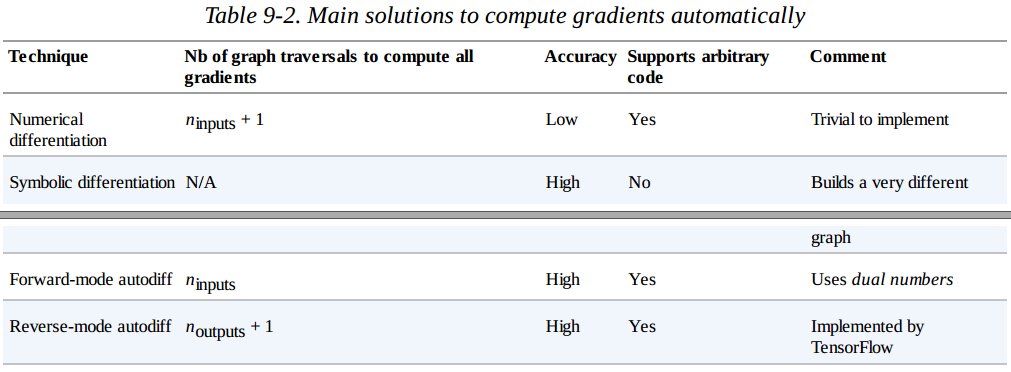

Check out **Appendix D.**

### Using an Optimizer

So TensorFlow computes the gradients for you. But it gets even easier: it also **provides a number of optimizers out of the box**, including a Gradient Descent optimizer. 

You can simply replace the preceding `gradients = ...` and `training_op = ...` lines with the following code, and once again everything will just work fine:

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

If you want to use a different type of optimizer, you just need to change one line. For example, you can use a momentum optimizer (which often converges much faster than Gradient Descent; see Chapter 11) by defining the optimizer like this:

In [ ]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
momentum=0.9)

## Feeding Data to the Training Algorithm

Let’s try to modify the previous code to implement **Mini-batch Gradient Descent**. 

We need a way to replace `X` and `y` at **every iteration** with the next mini-batch. 

The simplest way to do this is to use **placeholder nodes**.

These nodes are special because *they don’t actually perform any computation, they just output the data you tell them to output at runtime*. 


They are typically used to **pass the training data** to TensorFlow during training. 

If you don’t specify a value at runtime for a placeholder, you get an exception.


To create a placeholder node, you must call the `placeholder()` function and **specify the output tensor’s data type**. 

Optionally, you can also specify **its shape**, if you want to enforce it. 

**If you specify `None` for a dimension, it means “any size.”** 


For example, the following code creates a placeholder node `A`, and also a node `B = A + 5`. 

When we evaluate `B`, we pass a `feed_dict` to the `eval()` method that specifies the value of `A`. Note that `A` must have rank 2 (i.e., it must be two-dimensional) and there must be three columns (or else an exception is raised), but it can have **any number of rows**. 

In [ ]:
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2)

**NOTE**

You can actually feed the **output of any operations**, not just placeholders. In this case TensorFlow does not try to evaluate these operations; it uses the values you feed it.

To implement Mini-batch Gradient Descent, we only need to tweak the existing code slightly. First change the definition of `X` and `y` in the *construction phase* to make them placeholder nodes:

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

Then define the batch size and compute the total number of batches:

In [ ]:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

Finally, in the *execution phase*, fetch the mini-batches one by one, then provide the value of `X` and `y` via the `feed_dict` parameter when evaluating a node that depends on either of them.

In [ ]:
def fetch_batch(epoch, batch_index, batch_size):
    # [...] # load the data from disk
    return X_batch, y_batch

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
    for batch_index in range(n_batches):
        X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    best_theta = theta.eval()

We don’t need to pass the value of `X` and `y` when evaluating theta since it does not depend on either of them.

## Saving and Restoring Models

Once you have trained your model, you should **save its parameters** to disk so you can come back to it whenever you want, use it in another program, compare it to other models, and so on. 

Moreover, you probably want to **save checkpoints** at *regular intervals* during training so that if your computer crashes during training you can continue from the last checkpoint rather than start over from scratch.

TensorFlow makes saving and restoring a model very easy. 

* Just create a `Saver` node at the end of the *construction phase* (after all variable nodes are created); 
* In the execution phase, just call its `save()` method whenever you want to save the model, passing it the **session** and **path of the checkpoint** file:

In [ ]:
# n_epochs = 1000
# learning_rate = 0.01

# X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
# y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

# theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")

# y_pred = tf.matmul(X, theta, name="predictions")

# error = y_pred - y

# mse = tf.reduce_mean(tf.square(error), name="mse")

# gradients = 2/m * tf.matmul(tf.transpose(X), error)

# training_op = tf.assign(theta, theta - learning_rate * gradients)

# init = tf.global_variables_initializer()

# with tf.Session() as sess:
#     sess.run(init)
#     for epoch in range(n_epochs):
#         if epoch % 100 == 0:
#         print("Epoch", epoch, "MSE =", mse.eval())
#         sess.run(training_op)
    
#     best_theta = theta.eval()


In [ ]:
# [...]
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
# [...]

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0: # checkpoint every 100 epochs
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

Restoring a model is just as easy: 

you create a `Saver` at the **end of the construction phase** just like before, but then at the **beginning of the execution phase**, *instead of initializing the variables* using the `init` node, you call the `restore()` method of the `Saver` object:

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    ## [...]

By default a `Saver` saves and restores **all variables under their own name**, but if you need more control, you can specify *which variables to save or restore*, and *what names to use*. 

For example, the following `Saver` will save or restore only the `theta` variable under the name "weights":

In [ ]:
saver = tf.train.Saver({"weights": theta})

By default, the `save()` method also saves the **structure of the graph** in a second file with the same name plus a `.meta` extension. 

You can load this graph structure using `tf.train.import_meta_graph()`. 

This **adds the graph to the default graph**, and returns a `Saver` instance that you can then use to restore the graph’s state (i.e., the variable values):

In [ ]:
saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    # [...]

This allows you to fully restore a saved model, including **both the graph structure and the variable values**, without having to search for the code that built it.

### Visualizing the Graph and Training Curves Using TensorBoard

We are still relying on the `print()` function to visualize progress during training. 

There is a better way:

enter **TensorBoard**. 

If you feed it some *training stats*, it will display nice interactive visualizations of
these stats in your web browser (e.g., learning curves). 

You can also provide it the *graph’s definition* and it will give you a great interface to browse through it. This is very useful to

* identify errors in the graph, 
* to find bottlenecks, and so on.

The first step is to tweak your program a bit so it writes the graph definition and some training stats — for example, the training error (MSE) — to a **log directory** that TensorBoard will read from. 

You need to use a **different log directory every time you run your program**, or else TensorBoard will *merge* stats from different runs, which will mess up the visualizations. The simplest solution for this is to include a **timestamp** in the log directory name. Add the following code at the beginning of the program:

In [ ]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

Next, add the following code at the very end of the construction phase:

In [ ]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

The first line *creates a node in the graph* that will evaluate the MSE value and write it to a TensorBoard-compatible binary log string called a `summary`. 


The second line creates a `FileWriter` that you will use to write summaries to logfiles in the log directory:

* The first parameter indicates the path of the log directory (in this case something like tf_logs/run-20160906091959/, relative to the current directory).

* The second (optional) parameter is **the graph you want to visualize**. Upon creation, the `FileWriter` creates the log directory if it does not already exist (and its parent directories if needed), and writes the graph definition in a binary logfile called an *events file*.

Next you need to **update the execution phase** to evaluate the `mse_summary` node regularly during training (e.g., every 10 mini-batches). 

This will output a summary that you can then write to the events file using the `file_writer`. Here is the updated code:

In [ ]:
[...]
for batch_index in range(n_batches):
    X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
    
    if batch_index % 10 == 0:
        summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
        step = epoch * n_batches + batch_index
        file_writer.add_summary(summary_str, step)
    
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
[...]

**WARNING**

Avoid logging training stats at every single training step, as this would significantly slow down training.

Finally, you want to close the `FileWriter` at the end of the program:

In [ ]:
file_writer.close()

Now run this program: it will create the log directory and write an events file in this directory, containing both the graph definition and the MSE values. 

Open up a shell and go to your working directory, then type **$ ls -l tf_logs/run\*** to list the contents of the log directory:

\$ cd $ML_PATH # Your ML working directory (e.g., \$HOME/ml)

$ ls -l tf_logs/run*

total 40

-rw-r--r-- 1 ageron staff 18620 Sep 6 11:10 events.out.tfevents.1472553182.mymac

If you run the program a second time, you should see a second directory in the *tf_logs/* directory:

$ ls -l tf_logs/

total 0

drwxr-xr-x 3 ageron staff 102 Sep 6 10:07 run-20160906091959

drwxr-xr-x 3 ageron staff 102 Sep 6 10:22 run-20160906092202

Now it’s time to fire up the TensorBoard server. You need to activate your virtualenv environment if you created one, then start the server by running the tensorboard command, *pointing it to the root log directory*. This starts the TensorBoard web server, listening on **port 6006** (which is “goog” written upside down):

$ source env/bin/activate

$ tensorboard --logdir tf_logs/

Starting TensorBoard on port 6006 (You can navigate to http://0.0.0.0:6006)

Open a browser and go to http://0.0.0.0:6006/ (or http://localhost:6006/). 

In the **Events** tab you should see MSE on the right. If you click on it, you will see a plot of the MSE during training, for both runs (Figure 9-3). You can check or uncheck the runs you want to see, zoom in or out, hover over the curve to get details, and so on.

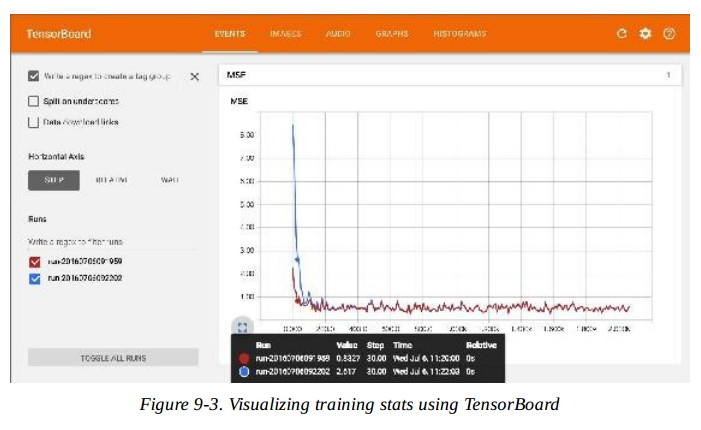

Now click on the **Graphs** tab. 

To reduce clutter, the nodes that have many **edges** (i.e., connections to other nodes) are separated out to an **auxiliary area on the right** (you can move a node back and forth between the main graph and the auxiliary area by right-clicking on it). 

Some parts of the graph are also collapsed by default. For example, try hovering over the `gradients` node, then click on the icon to expand this subgraph. 

Next, in this subgraph, try expanding the `mse_grad` subgraph.

*TIP*

If you want to take a peek at the graph directly within Jupyter, you can use the `show_graph()` function available in the notebook for this chapter. 

It was originally written by A. Mordvintsev in his great *deepdream tutorial notebook*. Another option is to install E. Jang’s *TensorFlow debugger tool* which includes a Jupyter extension for graph visualization (and more).

## Name Scopes

When dealing with more complex models such as neural networks, the graph can easily become cluttered with thousands of nodes. 

To avoid this, you can create **name scopes** to group related nodes. 

For example, let’s modify the previous code to define the `error` and `mse ops` within a name scope called "loss":

In [ ]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

The name of each op defined within the scope is now prefixed with "loss/":

In [ ]:
print(error.op.name)
loss/sub

In [ ]:
print(mse.op.name)
loss/mse

In TensorBoard, the `mse` and `error` nodes now appear inside the `loss` namespace, which appears collapsed by default (Figure 9-5).

### Modularity

Suppose you want to create a graph that adds the output of two *rectified linear units (ReLU)*. 

A ReLU computes a linear function of the inputs, and outputs the result if it is positive, and 0 otherwise, as shown in Equation 9-1.

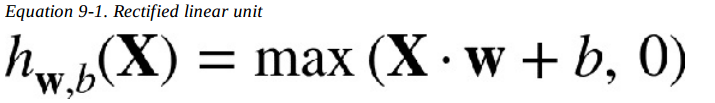

The following code does the job, but it’s quite repetitive:

In [ ]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")

b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")

output = tf.add(relu1, relu2, name="output")

Such repetitive code is hard to maintain and error-prone. 

It would become even worse if you wanted to add a few more ReLUs. 

Fortunately, TensorFlow lets you stay DRY (Don’t Repeat Yourself): 

simply create a function to build a ReLU. 

The following code creates five ReLUs and outputs their sum (note that `add_n()` creates an operation that will compute the sum of a list of tensors):

In [ ]:
def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

Note that when you create a node, TensorFlow checks whether its name already exists, and if it does it appends an *underscore followed by an index to make the name unique*. 

So the first ReLU contains nodes named "weights", "bias", "z", and "relu" (plus many more nodes with their default name, such as "MatMul"); the second ReLU contains nodes named "weights_1", "bias_1", and so on; the third ReLU contains nodes named "weights_2", "bias_2", and so on. 

TensorBoard identifies such series and *collapses them together* to reduce clutter (as you can see in Figure 9-6).

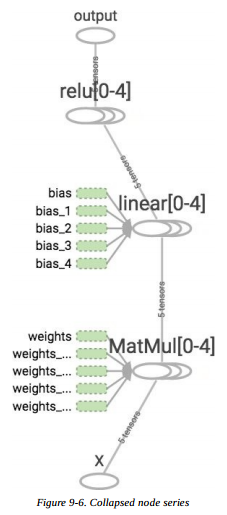

Using name scopes, you can make the graph much clearer. Simply move all the content of the `relu()` function inside a name scope. 

Figure 9-7 shows the resulting graph. Notice that TensorFlow also gives the name scopes unique names by appending _1, _2, and so on.

In [ ]:
def relu(X):
    with tf.name_scope("relu"):
        [...]

## Sharing Variables

f you want to share a variable between various components of your graph, one simple option is to create it first, then pass it as a parameter to the functions that need it. 


For example, suppose you want to control the *ReLU threshold* (currently hardcoded to 0) using a shared threshold variable for all ReLUs. 

You could just create that variable first, and then pass it to the `relu()` function:

In [ ]:
def relu(X, threshold):
    with tf.name_scope("relu"):
    [...]
    return tf.maximum(z, threshold, name="max")


threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

This works fine: now you can control the threshold for all ReLUs using the threshold variable.

However, if there are many shared parameters such as this one, *it will be painful to have to pass them around as parameters all the time*. 

Many people create a Python dictionary containing all the variables in their model, and pass it around to every function. Others create a class for each module (e.g., a ReLU class
using class variables to handle the shared parameter). 

Yet another option is to set the shared variable as an *attribute of the `relu()` function* upon the first call, like so:

In [ ]:
def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
        relu.threshold = tf.Variable(0.0, name="threshold")
        [...]
    return tf.maximum(z, relu.threshold, name="max")

TensorFlow offers another option, which may lead to slightly cleaner and more modular code than the previous solutions. 

This solution is a bit tricky to understand at first, but since it is used a lot in TensorFlow it is worth going into a bit of detail. 

The idea is to use the `get_variable()` function to 

* create the shared variable if it does not exist yet
* reuse it if it already exists. 

The desired behavior (creating or reusing) is controlled by an attribute of the current `variable_scope()`. 


For example, the following code will create a variable named `"relu/threshold"` (as a scalar, since `shape=()`, and using 0.0 as the initial value):

In [ ]:
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
    initializer=tf.constant_initializer(0.0))

Note that if the variable has already been created by an earlier call to `get_variable()`, this code will raise an exception. 

This behavior prevents reusing variables by mistake. If you want to reuse a variable,
you need to explicitly say so by setting the variable scope’s `reuse` attribute to `True` (in which case you don’t have to specify the shape or the initializer):

In [ ]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

This code will fetch the existing "relu/threshold" variable, or raise an exception if it does not exist or if it was not created using `get_variable()`. 

Alternatively, you can set the `reuse` attribute to `True` inside the block by calling the scope’s `reuse_variables()` method:

In [ ]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

*WARNING*

Once `reuse` is set to `True`, it cannot be set back to `False` within the block. 

Moreover, if you define other variable scopes inside this one, they will automatically inherit `reuse=True`. Lastly, only variables created by `get_variable()` can be reused this way.

Now you have all the pieces you need to make the relu() function access the threshold variable
without having to pass it as a parameter:

In [ ]:
def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold") # reuse existing variable
        [...]
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"): # create the variable
    threshold = tf.get_variable("threshold", shape=(),
    initializer=tf.constant_initializer(0.0))

relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

This code first defines the `relu()` function, then creates the `relu/threshold` variable (as a scalar that will later be initialized to 0.0) and builds five ReLUs by calling the `relu()` function. 

The `relu()` function reuses the `relu/threshold` variable, and creates the other ReLU nodes.

*NOTE*


Variables created using `get_variable()` are always named using the name of their variable_scope as a prefix (e.g., "relu/threshold"), but for all other nodes (including variables created with `tf.Variable()`) the variable scope acts like a new name scope. 

In particular, if a name scope with an identical name was already created, then a suffix is added to make the name unique. For example, all nodes created in the preceding code (except the threshold variable) have a name prefixed with "relu_1/" to "relu_5/", as shown in Figure 9-8

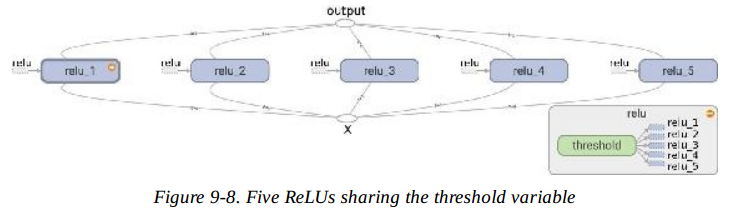

It is somewhat unfortunate that the `threshold` variable must be defined outside the `relu()` function, where all the rest of the ReLU code resides. To fix this, the following code creates the threshold variable within the `relu()` function upon the first call, then reuses it in subsequent calls. 

Now the `relu()` function does not have to worry about name scopes or variable sharing: it just calls `get_variable()`, which will create or reuse the threshold variable (it does not need to know which is the case). 

The rest of the code calls `relu()` five times, making sure to set `reuse=False` on the first call, and `reuse=True` for the other calls.

In [ ]:
def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
    initializer=tf.constant_initializer(0.0))
    [...]
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

The resulting graph is slightly different than before, since the shared variable lives within the first ReLU (see Figure 9-9)

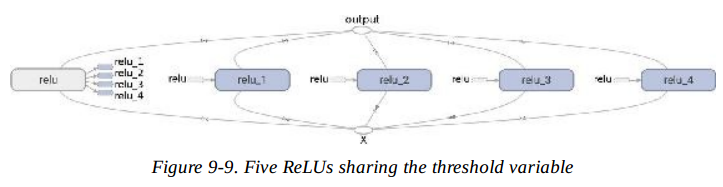

Exercises
1. What are the main benefits of creating a computation graph rather than directly executing the computations? What are the main drawbacks?

2. Is the statement `a_val = a.eval(session=sess)` equivalent to `a_val = sess.run(a)`?

3. Is the statement `a_val, b_val = a.eval(session=sess), b.eval(session=sess)` equivalent to
`a_val, b_val = sess.run([a, b])`?

4. Can you run two graphs in the same session?

5. If you create a graph `g` containing a variable `w`, then start two threads and open a session in each thread, both using the same graph `g`, will each session have its own copy of the variable `w` or will it be shared?

6. When is a variable initialized? When is it destroyed?

7. What is the difference between a placeholder and a variable?

8. What happens when you run the graph to evaluate an operation that depends on a placeholder but you don’t feed its value? What happens if the operation does not depend on the placeholder?

9. When you run a graph, can you feed the output value of any operation, or just the value of placeholders?

10. How can you set a variable to any value you want (during the execution phase)?

11. How many times does reverse-mode autodiff need to traverse the graph in order to compute the gradients of the cost function with regards to 10 variables? What about forward-mode autodiff? And symbolic differentiation?


12. Implement Logistic Regression with Mini-batch Gradient Descent using TensorFlow. Train it and evaluate it on the moons dataset (introduced in Chapter 5). Try adding all the bells and whistles: 

Define the graph within a `logistic_regression()` function that can be reused easily.
Save checkpoints using a `Saver` at regular intervals during training, and save the final model at the end of training. 

Restore the last checkpoint upon startup if training was interrupted.

Define the graph using nice scopes so the graph looks good in TensorBoard.

Add summaries to visualize the learning curves in TensorBoard.

Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at
the shape of the learning curve.